## Cohort Retention Rate

+ The Cohort Retention Rate helps you analyze how specific groups (or "cohorts") of customers behave over time.
+ A cohort is a group of customers who share a common characteristic, such as making their first purchase in the same month.
+ By tracking these cohorts over time, you can better understand customer behavior, retention patterns, and the effectiveness of marketing and engagement strategies.

**Steps to Calculate Cohort Retention Rate:**

**Define Cohorts:**

+ A cohort is a group of customers who share a specific characteristic. In the context of retention analysis, a common way to define a cohort is based on the month of the customer's first purchase.
+ For example, all customers who made their first purchase in January 2020 form the January 2020 cohort.

**Track Cohort Behavior Over Time:**

+ Track the percentage of customers from each cohort who return and make purchases in subsequent periods (months).
+ This will help identify how long customers from each cohort stay active and how their engagement changes over time.

**Calculate Retention Rates for Each Cohort:**

+ Calculate the retention rate for each cohort for each period following their acquisition.
+ For example, for the January 2020 cohort, calculate what percentage of those customers returned in February 2020, March 2020, and so on.

In [18]:
## required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [6]:
# Load the data
data = pd.read_csv('e_commerce_no_missing_values.csv')
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Extract the year and month from 'InvoiceDate' for grouping
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

In [14]:
# Identify the cohort month (month of the first purchase) for each customer
data['CohortMonth'] = data.groupby('CustomerID')['YearMonth'].transform('min')
# Create a period number for each transaction, representing the number of months since the first purchase
data['CohortIndex'] = (data['YearMonth'] - data['CohortMonth']).apply(lambda x: x.n)
# Count the number of unique customers for each cohort group and each month after their first purchase
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the table to create a matrix of cohorts by month
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [15]:
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
2010-02,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
2010-03,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
2010-04,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
2010-05,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Divide by the first column to calculate the retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,...,0.305263,0.261244,0.302392,0.289952,0.274641,0.262201,0.317703,0.305263,0.408612,0.208612
2010-01,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,...,0.152284,0.218274,0.187817,0.175127,0.185279,0.236041,0.185279,0.223350,0.073604,NaN
2010-02,1.0,0.300275,0.225895,0.303030,0.256198,0.209366,0.217631,0.283747,0.275482,0.292011,...,0.203857,0.184573,0.168044,0.146006,0.234160,0.247934,0.170799,0.063361,NaN,NaN
2010-03,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.114679,...,0.169725,0.174312,0.158257,0.169725,0.204128,0.213303,0.075688,NaN,NaN,NaN
2010-04,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.113402,0.116838,...,0.147766,0.140893,0.140893,0.171821,0.209622,0.065292,NaN,NaN,NaN,NaN
2010-05,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.129921,0.066929,0.086614,...,0.129921,0.141732,0.165354,0.157480,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.130112,0.092937,0.081784,0.118959,...,0.122677,0.137546,0.204461,0.059480,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.207650,0.202186,0.284153,0.300546,0.153005,0.114754,0.153005,0.142077,0.120219,...,0.174863,0.245902,0.092896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.246835,0.316456,0.322785,0.183544,0.132911,0.101266,0.139241,0.145570,0.132911,...,0.202532,0.069620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


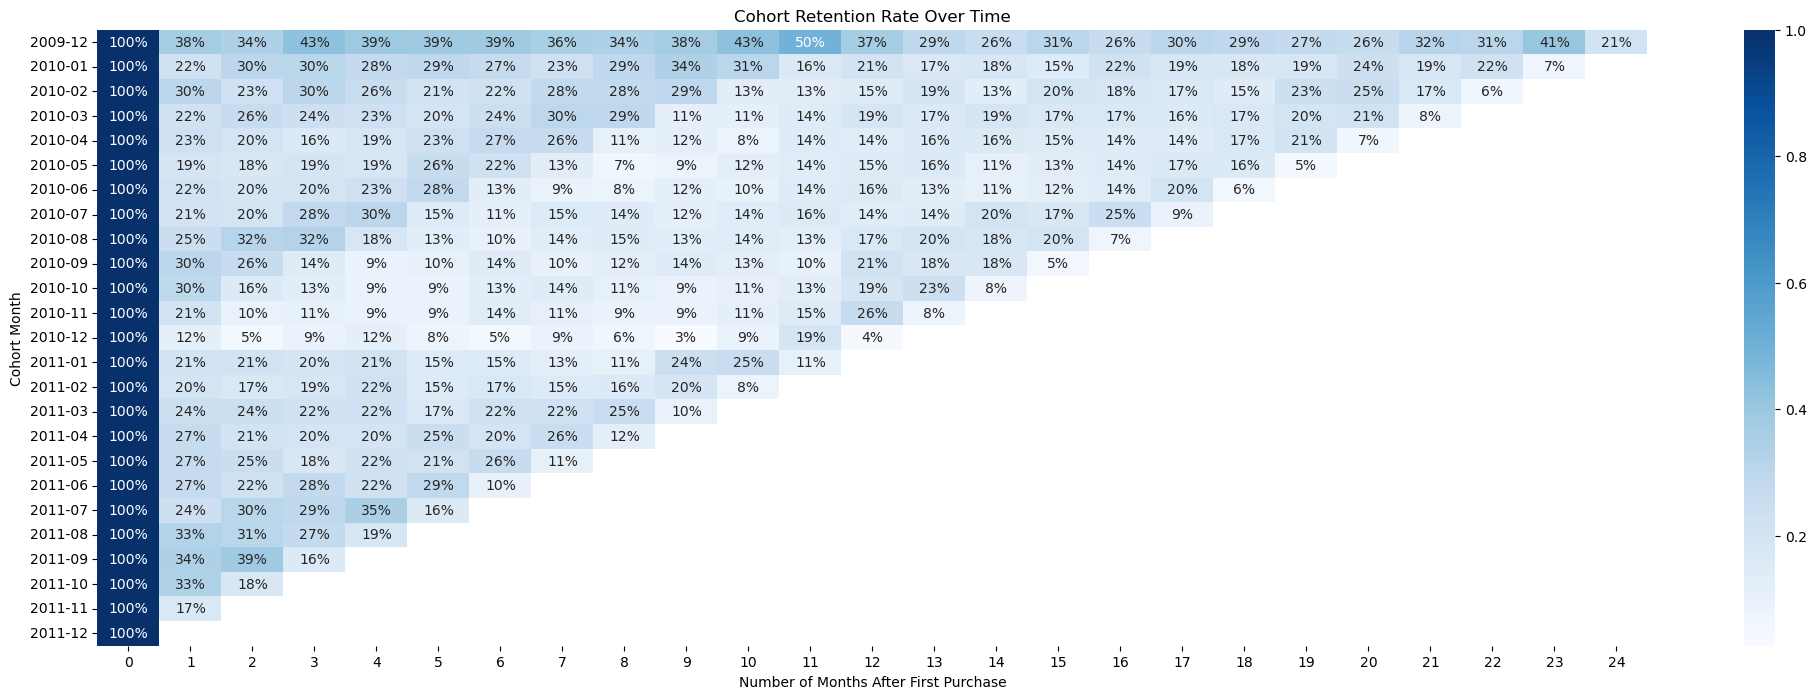

In [22]:
# Visualize the retention matrix
plt.figure(figsize=(25, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Rate Over Time')
plt.xlabel('Number of Months After First Purchase')
plt.ylabel('Cohort Month')
plt.show()

**Interpreting the Retention Matrix:**

+ Rows: Each row represents a cohort (e.g., customers who made their first purchase in a specific month).
+ Columns: Each column represents the number of months after the cohort's first purchase.
+ Cells: Each cell contains the retention rate, which shows the percentage of customers from that cohort who made a purchase in that specific month.

**Key Insights from Cohort Analysis:**

**Understand Customer Retention Over Time:**

+ Observe how long customers from different cohorts stay active.
+ For example, if a cohort has a high retention rate in the first few months but drops sharply afterward, it may indicate the need for better engagement strategies after the initial period.

**Identify Successful Periods or Campaigns:**

+ If certain cohorts have higher retention rates than others, it may be due to successful marketing campaigns, product launches, or other external factors during those periods.

**Make Data-Driven Decisions:**

+ Use the insights to make data-driven decisions about customer retention strategies, marketing campaigns, and product improvements.

*****

Cohort retention analysis is a powerful tool for understanding customer behavior and can be extended in several ways to provide deeper insights into your business. Here are some advanced concepts and techniques you can learn to enhance your analysis using cohort retention:

**Customer Segmentation within Cohorts:**


+ Segment customers within each cohort based on specific characteristics, such as purchase frequency, average order value, geographic location, or demographics.
+ Analyze retention rates for each segment to understand which types of customers are more loyal or valuable.

**Cohort-Based Revenue Analysis:**


+ Instead of just counting the number of customers retained, calculate the revenue generated by each cohort over time.
+ Analyze metrics such as Customer Lifetime Value (CLV), Average Revenue Per User (ARPU), and Monthly Recurring Revenue (MRR) for each cohort.

**Churn Analysis:**


+ Perform churn analysis alongside retention analysis to identify when and why customers stop purchasing.
+ Calculate churn rate for each cohort, which is the percentage of customers lost over a specific period.

**Predictive Cohort Analysis:**


+ Use machine learning models to predict future retention rates, customer lifetime value, or the likelihood of churn for each cohort.
+ Apply techniques like survival analysis, logistic regression, or random forests to model retention behavior.


**Behavioral Analysis:**


+ Analyze customer behavior patterns within each cohort, such as purchase frequency, time between purchases, and product preferences.
+ Study how changes in behavior correlate with retention rates.


**Time to First Repeat Purchase:**


+ Calculate the time it takes for customers in each cohort to make their second purchase (and subsequent purchases).
+ Analyze how this metric changes over time for different cohorts.

**Cohort Analysis with Other Metrics:**


+ Perform cohort analysis using other key performance indicators (KPIs) such as Net Promoter Score (NPS), Customer Satisfaction (CSAT), or Customer Engagement Scores.
+ Analyze how these metrics correlate with retention rates over time.

**Comparison Across Different Channels and Campaigns:**


+ Segment cohorts by acquisition channel (e.g., social media, email, paid ads) or campaign.
+ Compare retention rates across channels and campaigns to understand which are most effective at driving long-term customer engagement.


**Seasonal and Temporal Trends:**


+ Analyze how external factors, such as seasonality, holidays, or economic conditions, affect cohort retention rates.
+ Examine patterns like higher retention during certain months or events.


**Advanced Data Visualization Techniques:**


+ Use advanced visualization techniques to present cohort retention data effectively, such as heat maps, waterfall charts, and interactive dashboards.
+ Learn tools like Tableau, Power BI, or advanced Python libraries like Plotly for interactive data visualization.


To advance your understanding of cohort retention analysis, consider the following actions:

+ Experiment with Different Metrics: Start calculating additional metrics (like CLV, ARPU) for your cohorts.
+ Learn Advanced Analysis Techniques: Dive into machine learning techniques for predictive analysis.
+ Explore Visualization Tools: Familiarize yourself with data visualization tools to present insights more effectively.
+ Read Case Studies: Study how other businesses apply cohort analysis to gain insights.